# Regression Metrics Demo

This notebook uses basic metrics from scikit-learn to find out accuracy of a simple linear regression model

## Importing libraries

In [76]:
# General
import numpy as np
import pandas as pd

# Graphs
import matplotlib.pyplot as plt

# Generating dataset
from sklearn.datasets import make_regression

# Data training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Making a regression dataset

In [50]:
# Number of samples
n = 200

# Generating values
X, y = make_regression(n_samples=n, n_features=1, noise=40, random_state=42)

# bring X between 0 to 10 (CGPA Score)
X_min = X.min()
X_max = X.max()
X = ((X - X_min) / (X_max - X_min)) * 10
X = X.reshape(n)

# bring y between 0 to 5 (LPA)
y_min = y.min()
y_max = y.max()
y = ((y - y_min) / (y_max - y_min)) * 5

y = y.reshape(n)

# Making a dataframe
df = pd.DataFrame(data={'CGPA': X, 'Package': y})

df.head()

,CGPA,Package
0,8.374710,3.379718
1,5.792860,3.002542
2,2.600942,1.700036
3,6.077649,2.898252
4,4.771116,2.061273


Text(0, 0.5, 'Package (LPA)')

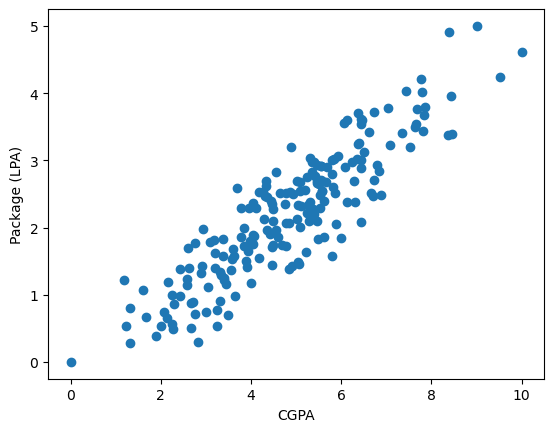

In [51]:
plt.scatter(df['CGPA'], df['Package'])
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')

## Training the data

In [63]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [70]:
# Training the data
lr = LinearRegression()
lr.fit(X_train.reshape(X_train.size,1), y_train)

LinearRegression()

Text(0, 0.5, 'Package (LPA)')

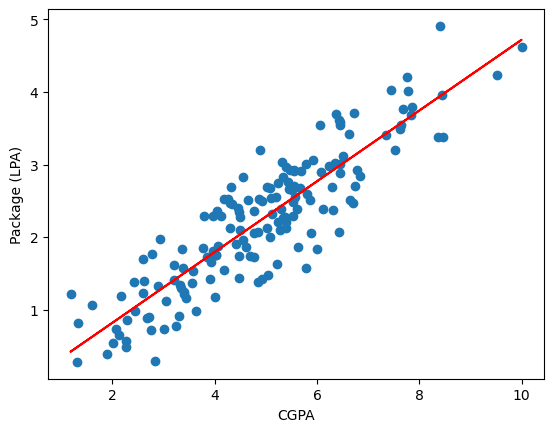

In [74]:
# Ploting the graph of the trained linear regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train.reshape(X_train.size, 1)), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')

## Checking accuracy using metrics

In [78]:
y_pred = lr.predict(X_test.reshape(X_test.size, 1))

In [88]:
# Mean Absolute Error
print('MAE:', mean_absolute_error(y_test, y_pred), 'in LPA')

MAE: 0.3435064372964091 in LPA


In [89]:
# Mean Squared Error
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 0.20065927194907945


In [90]:
# Root Mean Squared Error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)), 'in LPA')

RMSE: 0.44795007751877824 in LPA


In [87]:
# R2 Score
r2 = r2_score(y_test, y_pred)
print('R2 Score: ', r2)

R2 Score:  0.8147011463196501


In [92]:
# Adjusted R2 Score
adjusted_r2 = 1 - ((1 - r2) * (y_test.size - 1) / (y_test.size - 1 - 1))
print('Adjusted R2: ', adjusted_r2)

Adjusted R2:  0.809824860696483


In [93]:
## Thank you!